<a href="https://colab.research.google.com/github/subhanjan160901/NLP-Projects/blob/main/Transformer_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install transformers sentence-transformers datasets

In [4]:
from datasets import load_dataset
data = load_dataset('emotion', split='train')

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [6]:
data["label"][0:20]

[0, 0, 3, 2, 3, 0, 5, 4, 1, 2, 0, 1, 3, 0, 1, 1, 0, 0, 0, 4]

In [7]:
data.set_format("pandas")

In [9]:
df = data[:]
df.head(25)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
5,ive been feeling a little burdened lately wasn...,0
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,4
8,i have been with petronas for years i feel tha...,1
9,i feel romantic too,2



# Sentence Transformer Embeddings



In [10]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from tqdm import tqdm
import numpy as np

In [11]:
def embedding_generator(df_path, model):
  tqdm.pandas()
  model = SentenceTransformer(model)
  df['Embeddings'] = df['text'].progress_apply(lambda x: model.encode(x))
  return df

In [12]:
def inputgen(df):
  a = []
  for i in tqdm(range(len(df))):
    a.append(np.array(df["Embeddings"][i]))
  a = np.array(a)
  print(a.shape)
  return a

In [13]:
df = df[0:2000]

In [14]:
model1 = "sentence-transformers/all-MiniLM-L6-v2"
inputgen_input = embedding_generator(df, model1)
print("Model 1 embedding completed")
embed_output = inputgen(inputgen_input)
print("Model 1 array completed")

100%|██████████| 2000/2000 [00:37<00:00, 52.96it/s]


Model 1 embedding completed


100%|██████████| 2000/2000 [00:00<00:00, 184478.54it/s]

(2000, 384)
Model 1 array completed


In [15]:
embed = pd.DataFrame(embed_output)
df = pd.concat([df, embed], axis=1)
df

,text,label,Embeddings,0,1,2,3,4,5,6,...,374,375,376,377,378,379,380,381,382,383
0,i didnt feel humiliated,0,"[-0.05505094, -0.0076968716, 0.06353022, -0.03...",-0.055051,-0.007697,0.063530,-0.039664,0.116901,-0.123296,0.058080,...,0.063319,-0.044138,-0.034640,0.021249,-0.029084,0.084679,0.016152,0.015425,-0.135161,-0.064534
1,i can go from feeling so hopeless to so damned...,0,"[0.009238894, -0.0529643, 0.019262515, 0.03402...",0.009239,-0.052964,0.019263,0.034021,0.125203,0.027428,0.077058,...,-0.016320,-0.024402,-0.044897,0.132352,-0.082222,0.003469,0.095559,-0.060182,-0.027176,-0.026275
2,im grabbing a minute to post i feel greedy wrong,3,"[-0.0745029, -0.010641907, -0.0034595684, -0.0...",-0.074503,-0.010642,-0.003460,-0.073246,-0.018509,-0.026024,0.023559,...,0.050347,-0.030673,-0.001018,0.019752,0.078385,-0.010269,0.041514,-0.024779,-0.042020,0.024512
3,i am ever feeling nostalgic about the fireplac...,2,"[0.108594395, 0.0953223, 0.036476813, 0.015178...",0.108594,0.095322,0.036477,0.015178,0.089073,-0.012647,-0.089686,...,0.019334,-0.076964,-0.004122,0.023587,0.056529,0.024166,0.103731,-0.044091,-0.109329,0.034851
4,i am feeling grouchy,3,"[-0.01671223, -0.07877086, 0.03217011, -0.0538...",-0.016712,-0.078771,0.032170,-0.053829,0.115593,-0.051190,0.132093,...,-0.011990,0.003192,-0.077645,-0.016146,0.007182,0.029738,0.059137,-0.062703,-0.019559,-0.057704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,i feel so low and i havent felt this low in a ...,0,"[0.0074626156, -0.07295695, 0.06638431, 0.0524...",0.007463,-0.072957,0.066384,0.052478,0.011782,-0.002765,0.015952,...,-0.046977,-0.010427,-0.048182,0.081015,-0.056379,-0.043684,0.059703,-0.061770,-0.076507,-0.000722
1996,i absolutely love this skinny fiber it is doin...,1,"[-0.051176388, -0.046542447, 0.04218583, 0.060...",-0.051176,-0.046542,0.042186,0.060135,0.005652,-0.068989,0.031247,...,-0.010567,-0.019804,-0.038921,0.050018,-0.011048,0.008017,0.041045,-0.010521,0.005083,-0.002920
1997,i feel as if im in some strange catholic vortex,5,"[0.009284416, -0.09424601, 0.026456296, -0.002...",0.009284,-0.094246,0.026456,-0.002791,0.047796,-0.070760,0.011053,...,0.087301,-0.005810,0.040688,0.020890,-0.022804,-0.063676,0.061230,-0.020718,-0.048927,-0.092958
1998,i have a feeling that many of you will be surp...,5,"[0.11245159, -0.032926086, 0.11352211, -0.0342...",0.112452,-0.032926,0.113522,-0.034240,0.062835,0.008078,0.031408,...,0.096730,0.014149,-0.011893,0.077310,-0.106346,0.016515,0.078990,0.053615,-0.086291,-0.006568


# Embeddings Dimensionality Reduction

In [ ]:
! pip install umap-learn

In [17]:
from umap import UMAP
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sentence_transformers import SentenceTransformer
from tqdm import tqdm
import numpy as np

In [18]:
def embedding_generator(df_path, model):
  tqdm.pandas()
  model = SentenceTransformer(model)
  df['Embeddings'] = df['text'].progress_apply(lambda x: model.encode(x))
  return df

In [19]:
def inputgen(df):
  a = []
  for i in tqdm(range(len(df))):
    a.append(np.array(df["Embeddings"][i]))
  a = np.array(a)
  print(a.shape)
  return a

In [20]:
def dimensionality_reduction(embed_arr, label):
  X_scaled = MinMaxScaler().fit_transform(embed_arr)
  mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
  df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
  df_emb["label"] = label
  print(df_emb)
  return df_emb

In [21]:
model1 = "sentence-transformers/all-MiniLM-L6-v2"
inputgen_input = embedding_generator(df, model1)
print("Embedding completed")
embed_output = inputgen(inputgen_input)
print("Array completed")
dim_emb_out = dimensionality_reduction(embed_output, df["label"])
print("UMAP completed")

100%|██████████| 2000/2000 [00:36<00:00, 54.80it/s]


Embedding completed


100%|██████████| 2000/2000 [00:00<00:00, 139442.93it/s]


(2000, 384)
Array completed
              X          Y  label
0      8.244617  12.672316      0
1     11.298733  11.953047      0
2     10.009045  11.408400      3
3     12.716125  10.351336      2
4     10.916265  14.704189      3
...         ...        ...    ...
1995  11.039182  12.890970      0
1996  13.393860  11.698107      1
1997  10.538385  11.338340      5
1998  12.702455  10.262070      5
1999  10.542674   9.878514      1

[2000 rows x 3 columns]
UMAP completed


In [22]:
dim_emb_out

,X,Y,label
0,8.244617,12.672316,0
1,11.298733,11.953047,0
2,10.009045,11.408400,3
3,12.716125,10.351336,2
4,10.916265,14.704189,3
...,...,...,...
1995,11.039182,12.890970,0
1996,13.393860,11.698107,1
1997,10.538385,11.338340,5
1998,12.702455,10.262070,5


# Visualization of Embeddings

In [23]:
import matplotlib.pyplot as plt

              X          Y  label
0      8.244617  12.672316      0
1     11.298733  11.953047      0
5     11.437686  13.408207      0
10    10.471317  12.617589      0
13    12.138309  13.607059      0
...         ...        ...    ...
1983  10.125227   9.112698      0
1987  10.203731  10.389432      0
1989  10.637167  12.548372      0
1992  12.014701  12.788178      0
1995  11.039182  12.890970      0

[544 rows x 3 columns]
              X          Y  label
8     11.662235  11.055460      1
11    10.516051  11.092431      1
14    12.221014   8.828225      1
15    10.824186  13.494614      1
22     9.386945   9.316524      1
...         ...        ...    ...
1988  12.888473  12.114531      1
1991  11.912265   9.589839      1
1993   9.729739  10.810168      1
1996  13.393860  11.698107      1
1999  10.542674   9.878514      1

[702 rows x 3 columns]
              X          Y  label
3     12.716125  10.351336      2
9      9.053606  10.244121      2
47    10.053386  10.631764      2


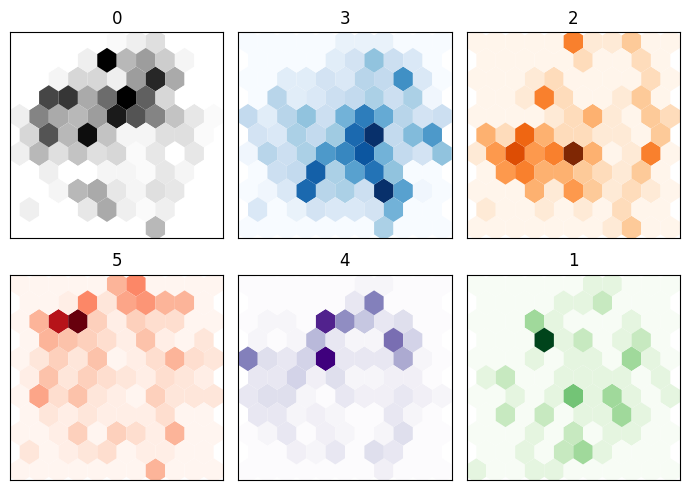

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels =df["label"].unique()
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = dim_emb_out.query(f"label == {i}")
    print(df_emb_sub)
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=10, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()